In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

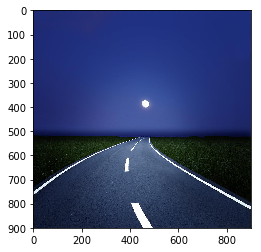

In [2]:
img = cv2.imread('road2.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [3]:
#img

In [4]:
def display(*showimage):
    for img in showimage:
        while True:
            cv2.imshow('displaying', img)
            if cv2.waitKey(1) & 0xFF == 27:
                break
    

    cv2.destroyAllWindows()

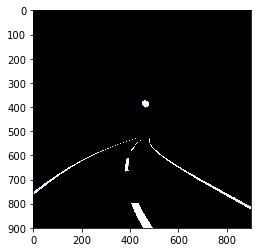

In [5]:
ret, thresh = cv2.threshold(img, 200, 255, cv2.THRESH_TOZERO)
plt.imshow(thresh, cmap='gray')

In [6]:
thresh.shape

(900, 900, 3)

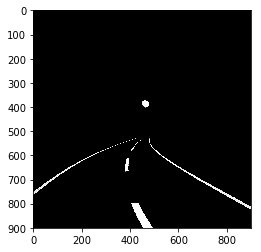

In [7]:
grayimg = cv2.cvtColor(thresh, cv2.COLOR_RGB2GRAY)
plt.imshow(grayimg, cmap='gray')

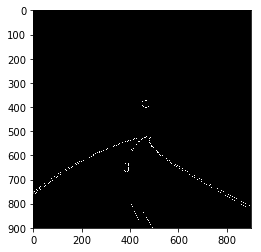

In [8]:
edges = cv2.Canny(grayimg, threshold1=50, threshold2=150)
plt.imshow(edges, cmap='gray')

In [9]:
display(edges)

In [10]:
hough = cv2.HoughLinesP(edges, rho=6, theta=np.pi/180, threshold=160, lines=np.array([]), minLineLength=40, maxLineGap=25)

In [11]:
blank_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)

In [12]:
for line in hough:
    for x1, y1, x2, y2 in line:
        cv2.line(blank_img, (x1,y1), (x2,y2), (0,255,0), 3)

In [13]:
final = cv2.addWeighted(img, 0.8, blank_img, 1, 0.0)

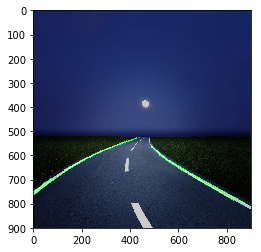

In [14]:
plt.imshow(final, cmap='gray')

In [15]:
display(final)

--------------------------
--------------------------

In [19]:
pts1 = np.float32([[0,600], [900,600], [0,900], [900,900]]) # top-left, top-right, bottom-left, bottom-right ------> (x,y)
pts2 = np.float32([[0, 0], [500, 0], [0, 500], [500, 500]])

In [20]:
matrix = cv2.getPerspectiveTransform(pts1, pts2)
result = cv2.warpPerspective(thresh, matrix, (500, 500))

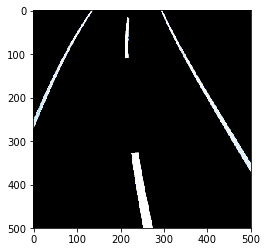

In [21]:
plt.imshow(result)


In [22]:
display(result)

In [23]:
while True:
    cv2.imshow('original', thresh)
    cv2.imshow('bird eye', result)
    cv2.imshow('lanes', final)
    if cv2.waitKey(1) & 0xFF == 27:
        break

cv2.destroyAllWindows()

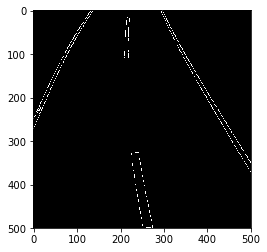

In [21]:
edges = cv2.Canny(result, 127, 127,L2gradient = True)
plt.imshow(edges, cmap='gray')

In [27]:
display(edges)

In [28]:
edges.max()

255

In [29]:
edges.min()

0

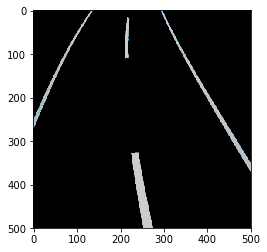

In [30]:
hough = cv2.HoughLinesP(edges, cv2.HOUGH_PROBABILISTIC, theta=np.pi/180, threshold=88, minLineLength=200, maxLineGap=50)
blank_img = np.zeros((result.shape[0], result.shape[1], 3), dtype=np.uint8)
for line in hough:
    for x1, y1, x2, y2 in line:
        cv2.line(blank_img, (x1,y1), (x2,y2), (0,255,0), 3)
final = cv2.addWeighted(result, 0.8, blank_img, 1, 0.0)
plt.imshow(final, cmap='gray')

In [31]:
display(blank_img)

In [44]:
circles = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, 1, 200, 255, 30, 10, 300)

In [45]:
circles

array([[[899.5, 183.5, 555. ],
        [380.5, 869.5, 305. ],
        [868.5, 381.5, 371.1],
        [881.5, 664.5, 488.5],
        [  2.5, 105.5, 553.7],
        [ 26.5, 376.5, 303.2]]], dtype=float32)

In [39]:
draw_circle = result.copy()

In [35]:
for i in circles[0, :]:
            center = (i[0], i[1])
            # circle center
            #cv2.circle(draw_circle, center, 3, (0, 0, 255), 3)
            # circle outline
            radius = i[2]
            cv2.circle(draw_circle, center, radius, (0, 255, 0), 3)

In [36]:
display(draw_circle)

------------------------------------------------------------------------------------
--------------------------------------------
### DO NOT RUN BELOW CODE UNTIL YOU REACH ANOTHER BOUNDARY
--------------------------------------------
--------------------------------------------

In [23]:
curveimg = cv2.imread("curves.png", 0)
display(curveimg)

In [24]:
edges = cv2.Canny(curveimg, 127, 127,L2gradient = True)
display(edges)

In [25]:
curveimg.shape

(247, 401)

In [29]:
display(*(curveimg, edges))

In [30]:
hough = cv2.HoughLinesP(edges, cv2.HOUGH_PROBABILISTIC, theta=np.pi/180, threshold=10, minLineLength=20, maxLineGap=5)
blank_img = np.zeros((curveimg.shape[0], curveimg.shape[1]), dtype=np.uint8)
for line in hough:
    for x1, y1, x2, y2 in line:
        cv2.line(blank_img, (x1,y1), (x2,y2), (0,255,0), 3)
final = cv2.addWeighted(result, 0.8, blank_img, 1, 0.0)
plt.imshow(final, cmap='gray')

error: OpenCV(3.4.2) C:\Miniconda3\conda-bld\opencv-suite_1534379934306\work\modules\core\src\arithm.cpp:659: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and the same number of channels), nor 'array op scalar', nor 'scalar op array' in function 'cv::arithm_op'


-----------------
-----------------
# YOU CAN RUN 
--------
-------

In [24]:
black = np.zeros((result.shape[0], result.shape[1], 3), dtype=np.uint8)
leftlines = []
rightlines = []
mid = result.shape[0] // 2
for line in hough:
    #print(line)
    for x1, y1, x2, y2 in line:
        print([x1,y1],",", [x2, y2])
        cv2.line(black, (x1,y1), (x2,y2), (0,255,0), 3)
        display(black)
        black = np.zeros((result.shape[0], result.shape[1], 3), dtype=np.uint8)
        if x1 & x2 < mid:
            leftlines.append([ x1,y1 ])
            leftlines.append([ x2,y2 ])
        else:
            rightlines.append([ x1,y1 ])
            rightlines.append([ x2,y2 ])

[304, 27] , [489, 335]
[333, 86] , [490, 358]
[0, 274] , [99, 52]
[0, 257] , [127, 8]


In [25]:
print(leftlines, '\n', rightlines)
rightlines = np.array(rightlines)
leftlines = np.array(leftlines)

[[0, 274], [99, 52], [0, 257], [127, 8]] 
 [[304, 27], [489, 335], [333, 86], [490, 358]]


In [26]:
rightlines = np.sort(rightlines, axis = 0)
leftlines = np.sort(leftlines, axis = 0)

In [27]:
leftlines

array([[  0,   8],
       [  0,  52],
       [ 99, 257],
       [127, 274]], dtype=int32)

In [28]:
#leftlines = np.array([[26, 212], [26, 192], [79, 98],  [89, 68]] , np.int32)

In [29]:
black = np.zeros((result.shape[0], result.shape[1], 3), dtype=np.uint8)
#x1, y1, x2, y2 = hough[max_distance][0]
#cv2.polylines(black, [rightlines], False, (0,255,0), 3)
cv2.polylines(black, [leftlines], False, (0,255,0), 3)
display(black)

In [30]:
sorted([rightlines], reverse = True)

[array([[304,  27],
        [333,  86],
        [489, 335],
        [490, 358]], dtype=int32)]

In [31]:
func = lambda a,b,c,d : math.sqrt( (a-c)**2 + (b-d)**2 )
max_distance = np.argmax( [ func(line[0][0], line[0][1], line[0][2], line[0][3]) for line in hough] )
print(hough[max_distance][0])

[304  27 489 335]


In [32]:
black = np.zeros((result.shape[0], result.shape[1], 3), dtype=np.uint8)
x1, y1, x2, y2 = hough[max_distance][0]
cv2.line(black, (x1,y1), (x2,y2), (0,255,0), 3)
display(black)